# Loading a DEM

We'd like to load the Mt St Helens data so we can get a NumPy array representation and plot it.

But DEMs can come at us in a lot of different formats.

----

## DEM format

This is an old USGS format.

Let's look at the data from [this page](http://gis.ess.washington.edu/data/raster/thirtymeter/mtsthelens/).

In [1]:
import requests
import io
import zipfile

r = requests.get("http://gis.ess.washington.edu/data/raster/thirtymeter/mtsthelens/OldMtStHelens.zip")

archive = zipfile.ZipFile(io.BytesIO(r.content), 'r')

[f.filename for f in archive.filelist]

['OldMtStHelens.dem']

In [2]:
dem = archive.read('OldMtStHelens.dem').decode('utf-8')

dem

'MOUNT SAINT HELENS, WA - 24000  LAT:: 46.125 LONG:: -122.125 SCALE:: 24000  SDTS to DEM, By Sol Katz, Jun 1998, ver .011                             1     1     1    10  0.000000000000000D+000  0.000000000000000D+000  0.000000000000000D+000  0.000000000000000D+000  0.000000000000000D+000  0.000000000000000D+000  0.000000000000000D+000  0.000000000000000D+000  0.000000000000000D+000  0.000000000000000D+000  0.000000000000000D+000  0.000000000000000D+000  0.000000000000000D+000  0.000000000000000D+000  0.000000000000000D+000     2     2     4  5.579450000000000D+005  5.107991500000000D+006  5.578138125000000D+005  5.121880000000000D+006  5.674494375000000D+005  5.121978500000000D+006  5.676025000000000D+005  5.108090000000000D+006  6.760000000000000D+002  2.951000000000000D+003  0.000000000000000D+000     03.00000D+0013.00000D+0011.00000D+000     1   327                         2 1                                                                                                           

This format is not easy to parse... we'd need to find a loader out there somewhere or look at `xarray` to make any progress with it.

## TIFF format

The same source also provides TIFF files.

In [4]:
r = requests.get("http://gis.ess.washington.edu/data/raster/thirtymeter/mtsthelens/tifs.zip")

archive = zipfile.ZipFile(io.BytesIO(r.content), 'r')

[f.filename for f in archive.filelist]

['new10.tif', 'new30.tif', 'old30.tif']

In [5]:
imdata = archive.read('new30.tif')

imdata

b'II*\x00\x08\x00\x00\x00\x11\x00\xfe\x00\x04\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x04\x00\x01\x00\x00\x00G\x01\x00\x00\x01\x01\x04\x00\x01\x00\x00\x00\xd2\x01\x00\x00\x02\x01\x03\x00\x01\x00\x00\x00\x10\x00\x00\x00\x03\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x06\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x11\x01\x04\x00$\x00\x00\x00\x04\x01\x00\x00\x15\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x16\x01\x04\x00\x01\x00\x00\x00\r\x00\x00\x00\x17\x01\x04\x00$\x00\x00\x00\x81\xa8\x04\x00\x1a\x01\x05\x00\x01\x00\x00\x00\x94\x01\x00\x00\x1b\x01\x05\x00\x01\x00\x00\x00\x9c\x01\x00\x00(\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x001\x01\x02\x00\t\x00\x00\x00\xa4\x01\x00\x00\x0e\x83\x0c\x00\x03\x00\x00\x00\xdd\x01\x00\x00\x82\x84\x0c\x00\x06\x00\x00\x00\xad\x01\x00\x00\xaf\x87\x03\x00\x08\x00\x00\x00\xf5\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [10]:
from PIL import Image
import numpy as np

img = Image.open(io.BytesIO(imdata)) # <- I don't know why but this TIFF does not render.

arr = np.asarray(img)

arr.shape

(466, 327)

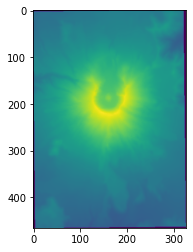

In [9]:
import matplotlib.pyplot as plt

plt.imshow(arr)

Much easier! But you have to hope that someone has produced TIFFs for you.

## E00 format

This is an ArcGIS format.

Let's look at the files referred to in _Digital Elevation Models of the Pre-Eruption 2000 Crater and 2004–07 Dome-Building Eruption at Mount St. Helens, Washington, USA_, by J.A. Messerich, S.P. Schilling, and R.A. Thompson, https://pubs.usgs.gov/of/2008/1169/

In [11]:
import requests
import io

r = requests.get("https://pubs.usgs.gov/of/2008/1169/downloads/MSH_DEMs.zip")

with open("MSH_DEMs.zip", "wb") as f:
    f.write(r.content)

In [12]:
import zipfile

archive = zipfile.ZipFile('MSH_DEMs.zip', 'r')

[f.filename for f in archive.filelist]

['MSH_DEMs/',
 'MSH_DEMs/year2000DEM/',
 'MSH_DEMs/year2000DEM/_notes/',
 'MSH_DEMs/year2000DEM/_notes/dwsync.xml',
 'MSH_DEMs/year2000DEM/msh00_83.e00',
 'MSH_DEMs/year2004DEM/',
 'MSH_DEMs/year2004DEM/_notes/',
 'MSH_DEMs/year2004DEM/_notes/dwsync.xml',
 'MSH_DEMs/year2004DEM/msh1011_83.e00',
 'MSH_DEMs/year2004DEM/msh1013_83.e00',
 'MSH_DEMs/year2004DEM/msh104_83.e00',
 'MSH_DEMs/year2004DEM/msh1104_83.e00',
 'MSH_DEMs/year2004DEM/msh1129_83.e00',
 'MSH_DEMs/year2004DEM/msh1211_83.e00',
 'MSH_DEMs/year2005DEM/',
 'MSH_DEMs/year2005DEM/_notes/',
 'MSH_DEMs/year2005DEM/_notes/dwsync.xml',
 'MSH_DEMs/year2005DEM/msh0201_83.e00',
 'MSH_DEMs/year2005DEM/msh1024_83.e00',
 'MSH_DEMs/year2005DEM/msh1215_83.e00',
 'MSH_DEMs/year2005DEM/msh13_83.e00',
 'MSH_DEMs/year2005DEM/msh221_83.e00',
 'MSH_DEMs/year2005DEM/msh310_83.e00',
 'MSH_DEMs/year2005DEM/msh419_83.e00',
 'MSH_DEMs/year2005DEM/msh615_83.e00',
 'MSH_DEMs/year2005DEM/msh714_83.e00',
 'MSH_DEMs/year2005DEM/msh810_83.e00',
 'MSH_DEMs/

In [13]:
data = archive.read('MSH_DEMs/year2000DEM/msh00_83.e00').decode('utf-8')

print(data)

EXP  0 D:\VOLUMES\MSH_DATA_8388\MSH_2000\MSH_83.E00                             
GRD  2
       303       442 2-0.34028234663853E+39
 0.10000000000000E+02 0.10000000000000E+02
 0.56119499850089E+06 0.51150549888518E+07
 0.56422499850089E+06 0.51194749888518E+07
 0.1361796E+04 0.1366035E+04 0.1369620E+04 0.1372218E+04 0.1372525E+04
 0.1375305E+04 0.1378085E+04 0.1380865E+04 0.1382709E+04 0.1384553E+04
 0.1386398E+04 0.1386992E+04 0.1387587E+04 0.1388181E+04 0.1388769E+04
 0.1389356E+04 0.1391011E+04 0.1393100E+04 0.1395189E+04 0.1397278E+04
 0.1398793E+04 0.1400307E+04 0.1401822E+04 0.1403337E+04 0.1404851E+04
 0.1406366E+04 0.1407603E+04 0.1408840E+04 0.1410077E+04 0.1404909E+04
 0.1399740E+04 0.1394572E+04 0.1394852E+04 0.1398947E+04 0.1403042E+04
 0.1402116E+04 0.1401190E+04 0.1400264E+04 0.1400720E+04 0.1401175E+04
 0.1401631E+04 0.1403749E+04 0.1405867E+04 0.1408143E+04 0.1412865E+04
 0.1415872E+04 0.1418385E+04 0.1421635E+04 0.1424063E+04 0.1426372E+04
 0.1427155E+04 0.1427938E+04 

In [14]:
import numpy as np

def read_e00_text(text, shape, header=6):
    """
    Parse a bunch of E00 formatted text and emit a NumPy array.
    """
    lines = text.split('\r\n')
    paydirt = lines[header: lines.index('EOG')]  # End Of Grid.
    paydirt = [p.split() for p in paydirt]
    
    # Unflatten this thing.
    values = []
    for pay in paydirt:
        for p in pay:
            values.append(float(p))
            
    # Convert to an array and reshape.
    arr = np.array(values).reshape(shape)
    
    return arr

arr = read_e00_text(data, (442, 305))

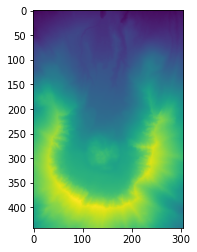

In [15]:
import matplotlib.pyplot as plt

plt.imshow(arr)

---

&copy; 2020 Agile Scientific, licenced CC-BY